<a href="https://colab.research.google.com/github/10100111/Display-of-HW1/blob/main/70_Lite_TensorFlow_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Lite

Макс 10 баллов

1. Создайте собственный dataset с помощью генератора (используйте инструменты TF). 

Пояснение: данные необходимо брать случайные (самостоятельно сгенерить). Подробности смотрите в документации. 

2. Напишите модель, предсказывающую значение функции y=cos(ax+b), где a и b - переменные (обучаемые веса).

3. Обучите нейросеть.

In [ ]:
import numpy as np
import tensorflow as tf
from random import random, randint
import datetime, os

In [ ]:
def gen():
  tensor1 = tf.random.normal((1, 1000), 0, 0.1)
  for i in tensor1:
    
    yield i

In [ ]:
# Сгенерим датасет с выходными данными типа float32))
dataset = tf.data.Dataset.from_generator(gen, output_types=(tf.float32))
list(dataset.take(10)) # Создает набор данных с не более чем '1' числом элементов из этого набора данных.

[<tf.Tensor: shape=(1000,), dtype=float32, numpy=
 array([ 5.84424734e-02, -1.19417310e-01,  2.87005361e-02, -1.03029860e-02,
         2.89055612e-02, -5.18104434e-02, -1.98861901e-02, -4.26211581e-02,
        -3.31202857e-02, -8.85592550e-02,  2.21995357e-02,  3.24827433e-02,
         8.65291629e-04, -6.54046610e-02, -2.84666959e-02,  2.53087766e-02,
         1.66024193e-02,  1.01450063e-01, -4.05608788e-02,  1.15019560e-01,
        -4.24784385e-02, -1.47404984e-01,  5.29208258e-02,  3.14900547e-01,
         1.17715066e-02,  1.25007316e-01,  9.74325556e-03,  3.02053969e-02,
        -1.04868867e-01, -3.51088829e-02, -1.84200659e-01,  5.99042475e-02,
         2.58099791e-02,  4.99992222e-02, -5.26244007e-02,  8.57624337e-02,
        -1.83452517e-02, -2.04460863e-02, -5.14075067e-03,  1.33076787e-01,
         9.85383317e-02, -2.16628537e-01, -1.50650918e-01,  1.14284661e-02,
        -1.53406769e-01, -5.23065813e-02,  2.88323741e-02,  9.24503878e-02,
        -1.15165927e-01,  1.30888848e-

In [ ]:
# dataset = dataset.map(tf.square).shuffle(4).batch(1) 
# # map - применяем операцию возведения в квадрат,
# # shuffle - перемешиваем выборку из заданного количества элементов,
# # batch - размер выборки

In [ ]:
# Обучение модели
# Создаем класс модели
class Model(object):
  # Переопределяем метод инициализации
  def __init__(self):
    self.W = tf.Variable(0.5)
    self.b = tf.Variable(1.0)

  # Переопределяем метод __call__
  def __call__(self, input):
    return tf.cos(self.W * input + self.b)

model = Model() # cоздаем объект созданного класса Model()

In [ ]:
# Демонстрация оператора assert
assert model(5.0) == 3.0, 'Данные не равны'

AssertionError: ignored

In [ ]:
# Подадим на вход модели число 5
model(5)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9364567>

In [ ]:
# Задаем функцию ошибки MSE
def loss (target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

In [ ]:
x = list(dataset.as_numpy_iterator()) # получаем данные из генератора датасета в виде списка
x = tf.constant(x) # формируем массив размерностью (1, 1000) и при подаче в модель нужно будет взять нулевой элемент = это будет соответсвовать размерам outputs

In [ ]:
TRUE_W = 12.0       # Задаем значение к которому должен сремиться W
TRUE_b = 6.0       # Задаем значение к которому должен стремиться b
NUM_EXAMPLES = 1000 # Кол-во элементов в списке х

inputs = x[0] # Берем нулевую размерность 1000 значений х
# noise = tf.random.normal(shape=[NUM_EXAMPLES], dtype=tf.dtypes.float32) # Задаем 1000 значений для смещения , это шум
outputs = tf.cos(TRUE_W * inputs + TRUE_b)  # Получаем 1000 значений yTrue (правильных ответов)

In [ ]:
x

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[-1.08289137e-01, -7.56771192e-02, -8.87352973e-03,
         3.28828144e-04, -4.64835688e-02,  5.84884658e-02,
        -8.00396875e-02, -1.09239630e-01,  7.89242014e-02,
        -3.28348577e-02,  2.23666076e-02,  1.01587646e-01,
         1.39320670e-02, -4.97035645e-02, -1.27762362e-01,
         9.55755860e-02, -9.97682363e-02,  1.48289457e-01,
         6.82090316e-03, -5.90913296e-02, -7.39529952e-02,
        -7.91748092e-02,  3.48804854e-02,  6.49413690e-02,
         1.83382556e-01,  5.23565756e-03, -1.66045874e-01,
         6.37526363e-02, -1.31548733e-01,  3.77096981e-02,
         5.06077819e-02, -4.93366718e-02,  9.07439515e-02,
        -1.99046031e-01,  1.81795955e-02,  9.46027339e-02,
        -2.95417812e-02, -1.06599582e-02,  2.65691942e-03,
        -1.01955034e-01, -8.55297316e-03,  2.31461152e-02,
         1.49724064e-02,  6.37383908e-02,  4.94379587e-02,
        -4.70327921e-02,  9.29358881e-03,  2.13086288e-02,
     

Current loss: 0.312893


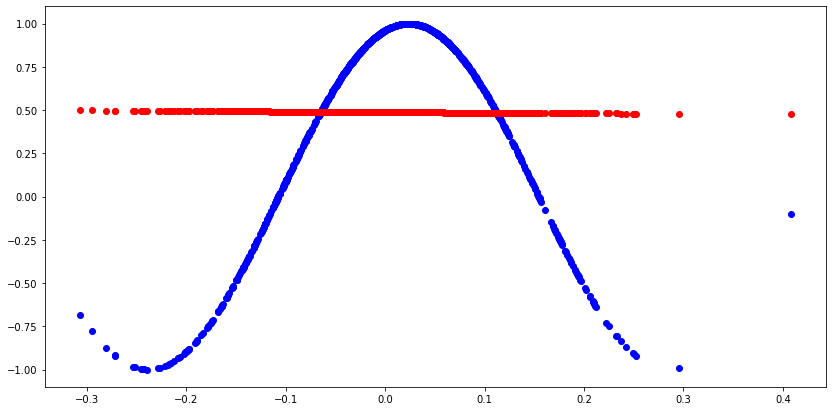

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.scatter(inputs, outputs, c='b') # выводим синим цветом правильные ответы
plt.scatter(inputs, model(inputs), c='r') # выводим красным цветом текущий результат работы модели

# Выводим текущее значение ошибки
print('Current loss: %1.6f' % loss(model(inputs), outputs))

In [ ]:
# Создаем функцию обучения модели
def train(molel, inputs, outputs, learning_rate):
  # Создаем ленту/блок GradientTape для автоматического расчета градиентов
  with tf.GradientTape() as t:
    current_loss = loss(outputs, model(inputs))           # получаем значение ошибки
    dW, db = t.gradient(current_loss, [model.W, model.b]) # считаем градиенты для параметров W и b
    model.W.assign_sub(tf.multiply(learning_rate, dW)) # обновляем значение W
    model.b.assign_sub(tf.multiply(learning_rate, db)) # обновляем значение b

In [ ]:
!rm -R /tmp/mylogs/eager

In [ ]:
!ls '/tmp/mylogs/eager'

ls: cannot access '/tmp/mylogs/eager': No such file or directory


In [ ]:
path = '/tmp/mylogs/eager'

In [ ]:
# Создаем логи для работы с TensorBoard
current_time = datetime.datetime.now().strftime('%Y%m%d - %H%M%S')
loss_log_dir = path + current_time + '/data'
loss_summary_writer = tf.summary.create_file_writer(loss_log_dir)

# Cоздаем модель
model = Model()
epoch = 0 # задаем начальное значение эпохи
# Оборачиваем в блок loss_summary_writer для того, чтобы сохранялись данные в логах TensorBoard
with loss_summary_writer.as_default():
  Ws, bs = [], [] # создаем пустые списки в которых будут храниться параметры W и b
  while epoch<1000:
    Ws.append(model.W) # добавляем в список Ws текущее значение 
    bs.append(model.b) # добавляем в список bs текущее значение
    current_loss = loss(outputs, model(inputs)) # получаем текущее значение ошибки

    train(model, inputs, outputs, learning_rate=0.1) # выполняем один шаг обучения модели

    # Выводим статистическую информацию после первой эпохи
    print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' %
          (epoch, Ws[-1], bs[-1], current_loss))
    
    # записываем информацию в TensorBoard
    tf.summary.scalar('current_loss', current_loss, step=epoch)
    tf.summary.scalar('W', Ws[-1], step=epoch)
    tf.summary.scalar('b', bs[-1], step=epoch)

    epoch+=1 # увеличиваем счетчик эпох
    loss_summary_writer.flush() # обновляем TensorBoard


Epoch  0: W=0.50 b=1.01, loss=0.33135
Epoch  1: W=0.49 b=1.02, loss=0.33013
Epoch  2: W=0.49 b=1.03, loss=0.32919
Epoch  3: W=0.49 b=1.04, loss=0.32846
Epoch  4: W=0.48 b=1.04, loss=0.32789
Epoch  5: W=0.48 b=1.05, loss=0.32744
Epoch  6: W=0.48 b=1.05, loss=0.32708
Epoch  7: W=0.47 b=1.06, loss=0.32679
Epoch  8: W=0.47 b=1.06, loss=0.32654
Epoch  9: W=0.47 b=1.06, loss=0.32634
Epoch 10: W=0.46 b=1.06, loss=0.32616
Epoch 11: W=0.46 b=1.07, loss=0.32600
Epoch 12: W=0.46 b=1.07, loss=0.32585
Epoch 13: W=0.46 b=1.07, loss=0.32571
Epoch 14: W=0.45 b=1.07, loss=0.32558
Epoch 15: W=0.45 b=1.07, loss=0.32546
Epoch 16: W=0.45 b=1.07, loss=0.32534
Epoch 17: W=0.44 b=1.07, loss=0.32523
Epoch 18: W=0.44 b=1.07, loss=0.32511
Epoch 19: W=0.44 b=1.07, loss=0.32500
Epoch 20: W=0.43 b=1.08, loss=0.32489
Epoch 21: W=0.43 b=1.08, loss=0.32478
Epoch 22: W=0.43 b=1.08, loss=0.32467
Epoch 23: W=0.42 b=1.08, loss=0.32456
Epoch 24: W=0.42 b=1.08, loss=0.32445
Epoch 25: W=0.42 b=1.08, loss=0.32434
Epoch 26: W=